<a href="https://colab.research.google.com/github/najmihusni/EDA_Titanic/blob/main/EDA(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA) on the Titanic dataset**

In this notebook, I perform an exploratory data analysis (EDA) on the Titanic dataset to uncover patterns and insights related to passenger survival. The dataset includes information about passengers such as age, sex, fare, class, and family size. Our goal is to understand which factors influenced survival on the Titanic.

In [ ]:
import pandas as pd

# Load dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)

# Display the first few rows
data.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**Data Cleaning**

In [ ]:
# Fill missing 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Assuming 'Fare' might have missing values
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Show cleaned data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
# Create a new feature 'FamilySize'
data['FamilySize'] = data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard'] + 1

# Create a new feature 'FarePerPerson'
data['FarePerPerson'] = data['Fare'] / data['FamilySize']

# Check the new features
data[['FamilySize', 'FarePerPerson']].head()


,FamilySize,FarePerPerson
0,2,3.62500
1,2,35.64165
2,1,7.92500
3,2,26.55000
4,1,8.05000


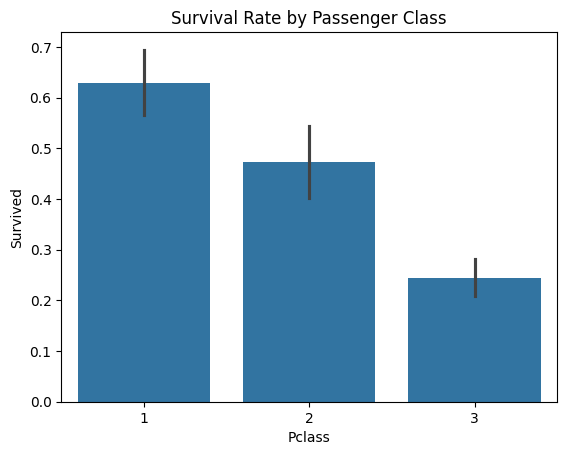

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()




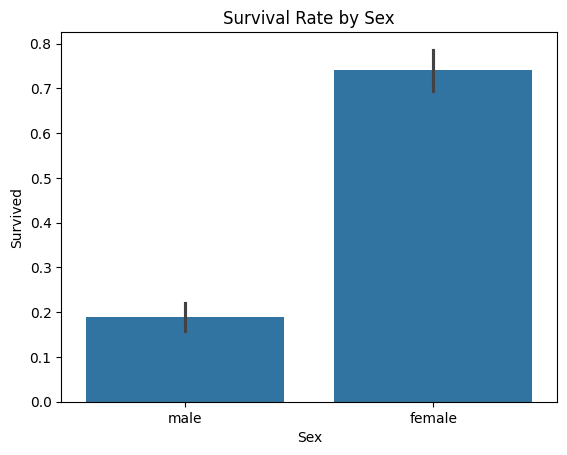

In [ ]:
# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()


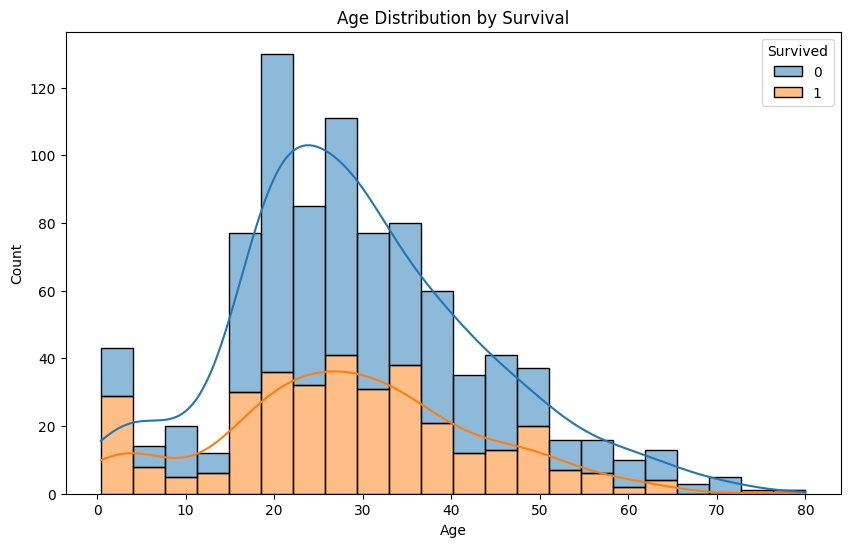

In [ ]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()


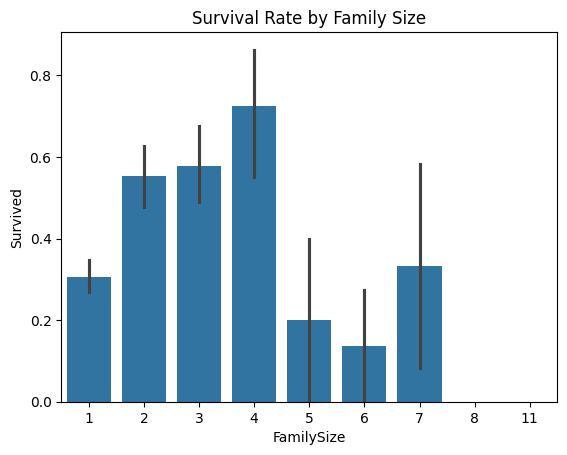

In [ ]:
# Survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')
plt.show()


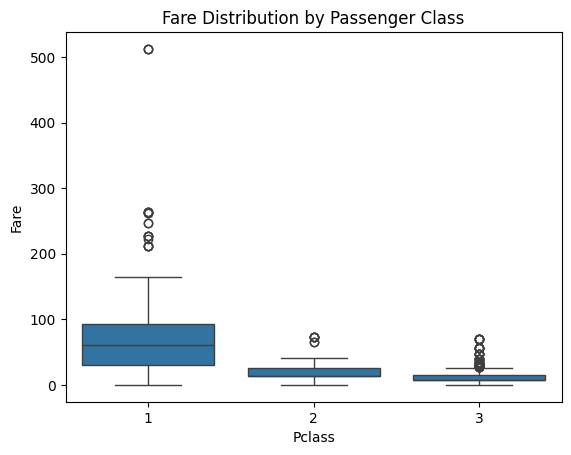

In [ ]:
# Fare distribution by class
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.show()


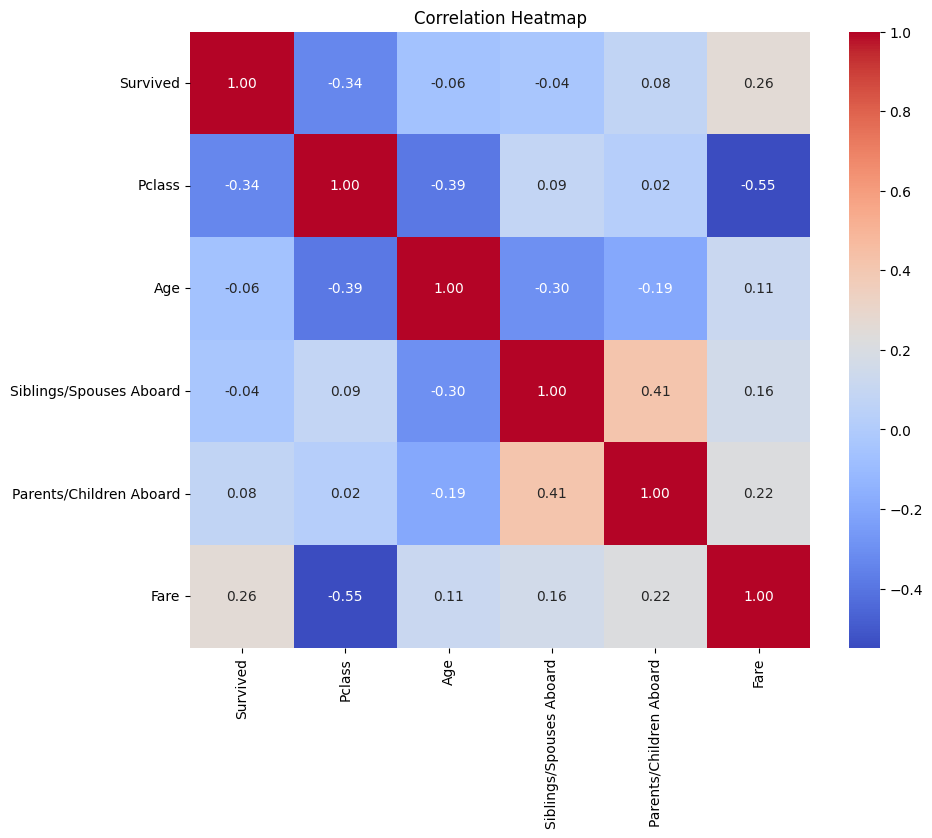

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)

# Select numeric columns
numeric_data = data.select_dtypes(include=['number'])


correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


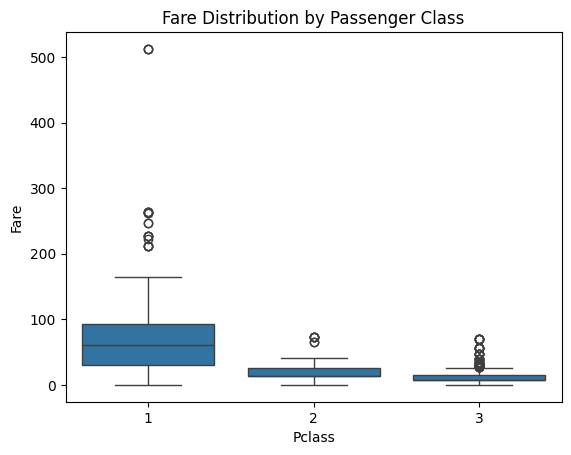

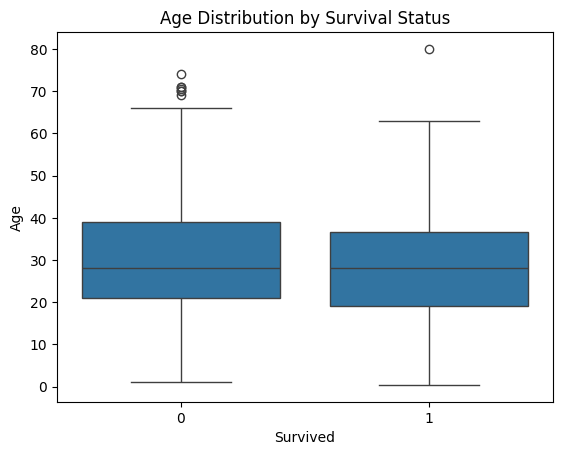

In [ ]:
# Boxplot for Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Boxplot for Age by Survived
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival Status')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Sex'], data['Survived'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test:")
print("Chi2 value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-Square Test:
Chi2 value: 258.3912607678978
p-value: 3.847574039733745e-58
Degrees of freedom: 1
Expected frequencies: [[192.93122886 121.06877114]
 [352.06877114 220.93122886]]


**Chi-Square Test**

The Chi-Square test shows a significant relationship between Sex and Survival, with a Chi2 value of approximately 258.39 and a p-value near zero, indicating that the observed and expected frequencies of survival among different sexes are significantly different.



In [ ]:
from scipy.stats import ttest_ind

# Split data into two groups
survived = data[data['Survived'] == 1]['Age']
not_survived = data[data['Survived'] == 0]['Age']

# Perform T-Test
t_stat, p_val = ttest_ind(survived, not_survived, nan_policy='omit')

print("T-Test for Age:")
print("T-statistic:", t_stat)
print("p-value:", p_val)


T-Test for Age:
T-statistic: -1.7781426849537694
p-value: 0.07572369567475853


**T-Test for Age**

The T-test for Age reveals no statistically significant difference between the mean ages of those who survived and those who did not, with a T-statistic of approximately -1.78 and a p-value of 0.076, suggesting age is not a strong differentiator for survival in this dataset.


**Summary of Findings**

Survival Analysis by Passenger Class and Sex:

*   Passengers in higher classes had higher survival rates compared to lower class
*   Females had a significantly higher chance of survival compared to males.

Impact of Age and Family Size:


*   Age did not show a strong correlation with survival, indicating age alone may not have been a determining factor.
*   Larger families did not necessarily fare better in terms of survival rates.


Fare Distribution and Survival:

*   Passengers who paid higher fares generally had better survival rates,
suggesting potential prioritization based on fare paid.

